# Data Scientist Associate Practical Exam Submission

Company Background:
- EMO is a manufacturer of electric motorcycles.
- EMO launched its first electric motorcycle in India in 2019.
- The product team has been asking website users to rate the motorcycles.
- Ratings from owners help the product team to improve the quality of the motorcycles.
- Ratings from non-owners help the product team add new features. They hope the new
	features will increase the number of new customers.
- The product team wants to extend the survey. But, they want to be sure they can predict
	whether the ratings came from owners or non-owners.


- ### Importing data

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('electric_bike_ratings_2212.csv')
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   owned            1500 non-null   int64  
 1   make_model       1500 non-null   object 
 2   review_month     1500 non-null   object 
 3   web_browser      1350 non-null   object 
 4   reviewer_age     1500 non-null   object 
 5   primary_use      1500 non-null   object 
 6   value_for_money  1500 non-null   object 
 7   overall_rating   1500 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 93.9+ KB
None


,owned,make_model,review_month,web_browser,reviewer_age,primary_use,value_for_money,overall_rating
0,1,Nielah-Eyden,Oct,Chrome,23,Commuting,5/10,18.62
1,0,Nielah-Keetra,Jun,NaN,24,Commuting,4/10,15.55
2,0,Lunna-Keetra,23-Oct,Chrome,28,Commuting,5/10,12.76
3,1,Hoang-Keetra,07-Nov,IE,41,Leisure,5/10,17.07
4,1,Lunna-Keetra,16-Sep,Chrome,33,Leisure,5/10,12.29


- ### Null Values

In [3]:
print(df.isnull().sum())

owned                0
make_model           0
review_month         0
web_browser        150
reviewer_age         0
primary_use          0
value_for_money      0
overall_rating       0
dtype: int64


- ### Missing Type
	Missing Values at Random in 'web_browser'

<AxesSubplot:>

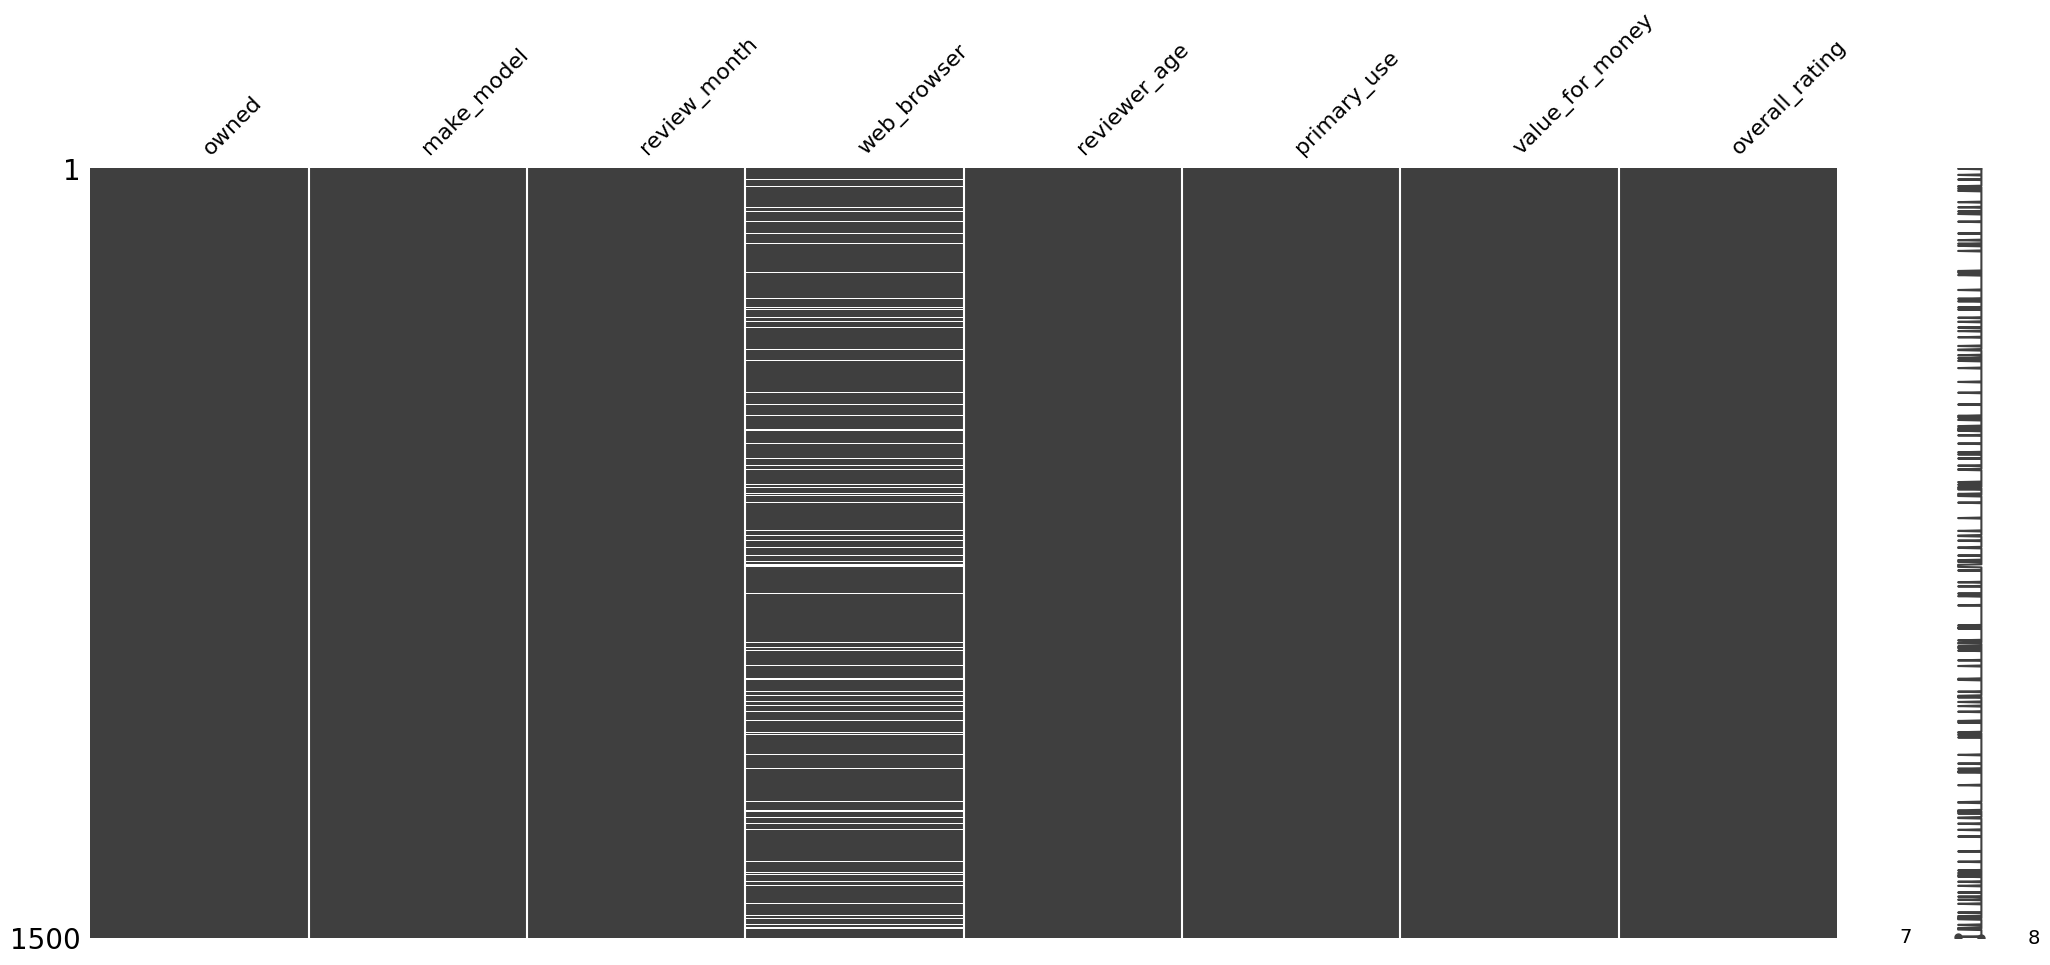

In [4]:
import missingno as msno
msno.matrix(df)

## Data Manipulation
1. owned

In [5]:
df['owned'] = df['owned'].replace(0,'Not_Owner')
df['owned'] = df['owned'].replace(1,'Owner')

In [6]:
def col_stats(df,col):
    print("Column Name:",col)
    print("Column Dtype:", df[col].dtype)
    print("Number of Unique Values:",df[col].nunique())
    print("Number of NaN Values:", df[col].isnull().sum())
    print("Value Counts:\n\n",df[col].value_counts(dropna=False))
    
col_stats(df,"owned")

Column Name: owned
Column Dtype: object
Number of Unique Values: 2
Number of NaN Values: 0
Value Counts:

 Owner        890
Not_Owner    610
Name: owned, dtype: int64


2. make_model

In [7]:
col_stats(df, 'make_model')

Column Name: make_model
Column Dtype: object
Number of Unique Values: 6
Number of NaN Values: 0
Value Counts:

 Nielah-Eyden     652
Lunna-Eyden      329
Lunna-Keetra     178
Hoang-Keetra     124
Hoang-Eyden      124
Nielah-Keetra     93
Name: make_model, dtype: int64


3. review_month - Extract month only

In [8]:
df['review_month'] = df['review_month'].str[-3:]
print(df.review_month.value_counts())
print(df.review_month.nunique(), "months")

Sep    141
Mar    141
May    138
Nov    126
Jan    126
Oct    125
Jun    124
Apr    123
Dec    117
Feb    115
Aug    114
Jul    110
Name: review_month, dtype: int64
12 months


4. web_browser - fill missing values with 'unknown'

In [9]:
df['web_browser'] = df.web_browser.fillna('unknown')
df['web_browser'].value_counts(dropna=False)

Chrome     698
IE         239
Firefox    233
unknown    150
Safari     133
Opera       24
Android     23
Name: web_browser, dtype: int64

5. reviewer_age - Clean & Impute missing values with Mean.

In [10]:
df['reviewer_age'] = df['reviewer_age'].replace('-',np.nan)
df['reviewer_age'] = df['reviewer_age'].astype(float)
df['reviewer_age'] = df['reviewer_age'].fillna(np.mean(df['reviewer_age']))
df['reviewer_age'] = df['reviewer_age'].astype('int64')
col_stats(df,'reviewer_age')

Column Name: reviewer_age
Column Dtype: int64
Number of Unique Values: 35
Number of NaN Values: 0
Value Counts:

 32    135
19     52
41     51
45     50
18     46
44     46
20     46
40     45
17     45
37     45
30     45
39     45
16     43
23     43
48     42
21     41
46     41
22     40
36     39
33     39
24     39
26     39
25     38
27     38
42     37
47     37
43     36
28     36
31     36
29     35
50     33
34     32
35     31
38     28
49     26
Name: reviewer_age, dtype: int64


6. primary_use

In [11]:
col_stats(df,'primary_use')

Column Name: primary_use
Column Dtype: object
Number of Unique Values: 2
Number of NaN Values: 0
Value Counts:

 Commuting    1095
Leisure       405
Name: primary_use, dtype: int64


7. value_for_money - Clean rating from '5/10' to '5'

In [12]:
df['value_for_money'] = df['value_for_money'].str[:-3]
df['value_for_money'] = df['value_for_money'].astype(int)
col_stats(df,'value_for_money')

Column Name: value_for_money
Column Dtype: int64
Number of Unique Values: 10
Number of NaN Values: 0
Value Counts:

 5     387
6     323
4     315
3     183
7     167
2      53
8      52
1      11
9       8
10      1
Name: value_for_money, dtype: int64


8. overall_rating

In [13]:
col_stats(df,'overall_rating')

Column Name: overall_rating
Column Dtype: float64
Number of Unique Values: 583
Number of NaN Values: 0
Value Counts:

 18.62    10
18.63    10
18.77    10
18.88    10
18.51    10
         ..
17.71     1
17.15     1
17.93     1
20.20     1
19.79     1
Name: overall_rating, Length: 583, dtype: int64


- ### Number of categories in categorical features

In [14]:
print("Number of Unique values:")
for col in df.select_dtypes(['object','bool']):
    print(col,"-", df[col].nunique())

Number of Unique values:
owned - 2
make_model - 6
review_month - 12
web_browser - 7
primary_use - 2


## Task 1:

- State whether the values match the description given in the table above.
- State the number of missing values in the column.
- Describe what you did to make values match the description if they did not
	match.

### _Data Validation_

1.  **'owned'** : 1 if reviewer owns mopet, else 0.

	- 	dtype - object, 
	-	missing values - 0, 
	-	no. of unique values - [2], 
	-	MATCH


2.  **'make_model'** : Make and Model of Mopet.

	-	dtype - object, 
    -   missing values - 0, 
    -   no.of unique values - [6], 
    -   MATCH


3.  **'review_month'** : Month the review was given.
		
    -   dtype - object, 
    -   missing values - 0, 
    -   no. of unique values - [332], 
    -   DO NOT MATCH

			- 'review_month' has messy data with dates along with months. Should have only 12 unique values(month). 
			- Cleaned the column by stripping out date.

4. **'web_browser'** : Browser used to post reviews.
		
    -   dtype - object, 
    -   missing values - 150, 
    -   no. of unique values - [6], 
    -   MATCH
	
    		- Replaced NaN values with 'unknown'

5.  **'reviewer_age'** : Age of the reviewer.
		
    -   dtype - object, 
    -   missing values - 0, 
    -   DO NOT MATCH
		
        	- Replaced 105 counts of '-' with mean of column
			- Changed dtype to 'int'

6.  **'primary_use'** : Primary usage of mopet.
		
    -   dtype - object, 
    -   missing values - 0, 
    -   no. of unique values - [2], 
    -   MATCH

7.  **'value_for_money'** : Rating given by user from 1 to 10.
		
    -	dtype - object, 
    -   missing values - 0, 
    -   no. of unique values - [10], 
    -   DO NOT MATCH
				
                - This rating was in format '5/10'. Stripped '/10' throughout the column.
				- Changed dtype to 'int'

8.  **'overall_rating'** : Total rating score after combining multiple rating scores.
		
    -	dtype - float, 
    -   missing values - 0, 
    -   MATCH

- After Data Validation the shape of dataframe is same. (1500,8)
- Cleaning: 'review_month','reviewer_age','value_for_money'
- Nan value Imputation: 'web_browser'
- Dtype transformation: 'owned','reviewer_age','value_for_money'

In [15]:
print(df.info())
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   owned            1500 non-null   object 
 1   make_model       1500 non-null   object 
 2   review_month     1500 non-null   object 
 3   web_browser      1500 non-null   object 
 4   reviewer_age     1500 non-null   int64  
 5   primary_use      1500 non-null   object 
 6   value_for_money  1500 non-null   int64  
 7   overall_rating   1500 non-null   float64
dtypes: float64(1), int64(2), object(5)
memory usage: 93.9+ KB
None


,owned,make_model,review_month,web_browser,reviewer_age,primary_use,value_for_money,overall_rating
0,Owner,Nielah-Eyden,Oct,Chrome,23,Commuting,5,18.62
1,Not_Owner,Nielah-Keetra,Jun,unknown,24,Commuting,4,15.55
2,Not_Owner,Lunna-Keetra,Oct,Chrome,28,Commuting,5,12.76
3,Owner,Hoang-Keetra,Nov,IE,41,Leisure,5,17.07
4,Owner,Lunna-Keetra,Sep,Chrome,33,Leisure,5,12.29
5,Not_Owner,Lunna-Eyden,Aug,IE,47,Commuting,5,15.28
6,Not_Owner,Lunna-Keetra,Mar,Chrome,20,Leisure,3,12.28
7,Owner,Nielah-Keetra,Mar,Chrome,32,Commuting,7,15.92
8,Owner,Nielah-Eyden,Mar,Chrome,35,Commuting,4,19.39
9,Owner,Nielah-Eyden,Jul,Firefox,22,Commuting,6,18.38


## Task 2

- Owners of mopet have given the most, 890 reviews (59.33%).
- Non-owners have given 610 reviews (40.67%).
- Observations can be considered balanced. No significant percentage difference between categories.

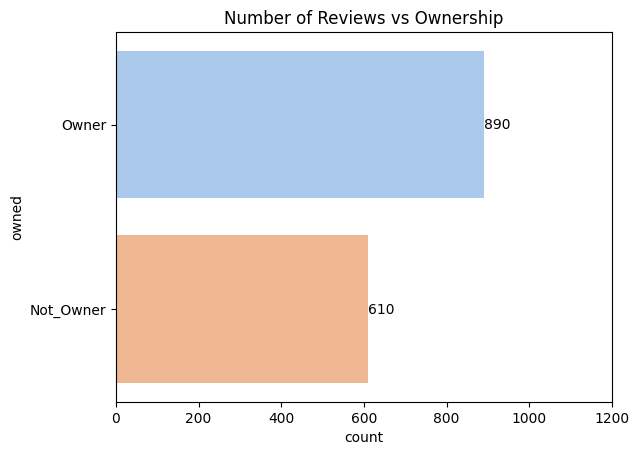

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette('pastel')
ax = sns.countplot(y='owned',data=df, order=["Owner", "Not_Owner"])
ax.bar_label(ax.containers[0])
ax.set(xlim=(0,1200))
ax.set(title='Number of Reviews vs Ownership')
plt.show()

## Task 3

- Distribution plot of overall_rating shows the distribution is **multimodal**.

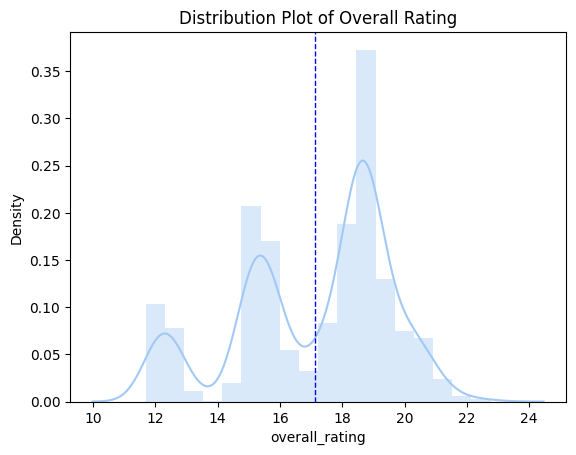

In [36]:
sns.distplot(df['overall_rating'],kde=True)
plt.axvline(x=df.overall_rating.mean(),color='blue',ls='--',lw=1)
plt.title('Distribution Plot of Overall Rating')
plt.show()

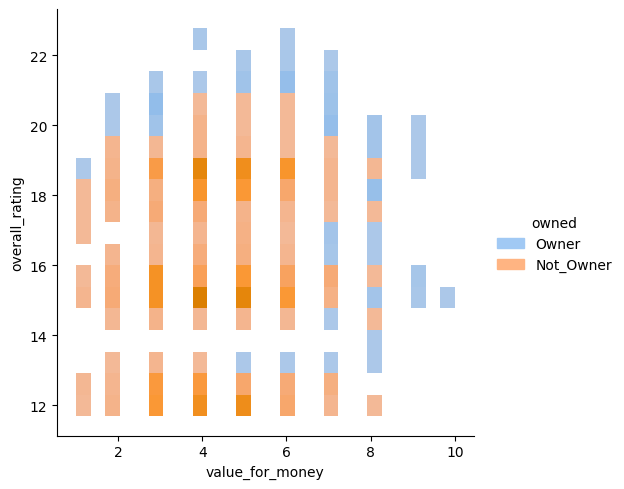

In [37]:
sns.displot(data=df, x='value_for_money',y='overall_rating',hue='owned')
plt.show()

## Task 4

-	The box plot shows that the relationship between overall rating and ownership is, there is majority of lower overall rating is by non-owners of the bike.
-	Average overall rating by non-owners is 15.7
-	Average overall rating by owner is 18.1
-	75% of non-owners have given a rating of 18.3 or below which is near to average of same by owners.
-	Maximum rating by non-owner is 20.5 
-	25% of owners have given a rating more than 19.2

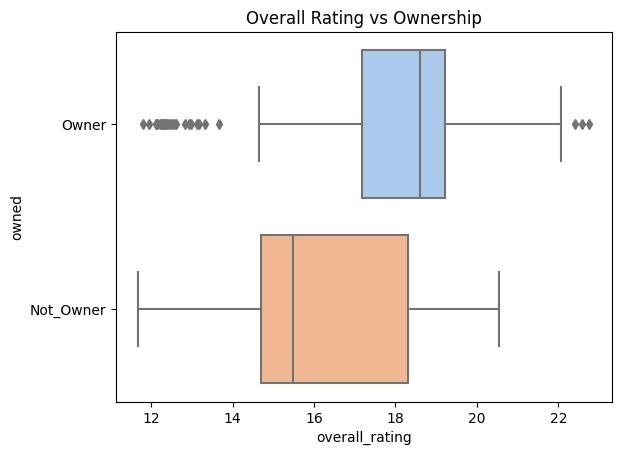

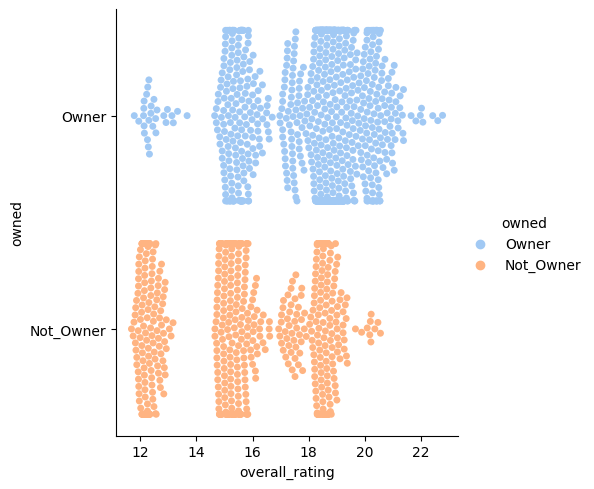

In [38]:
fig,ax = plt.subplots(sharex=True)
sns.boxplot(data=df,x='overall_rating',y='owned',ax=ax)
ax.set_title('Overall Rating vs Ownership')

sns.catplot(data=df,x='overall_rating',y='owned',hue='owned',ax=ax, kind="swarm")
ax.set_title('Overall Rating vs Ownership')
plt.show()

In [24]:
df.groupby('owned').overall_rating.describe()

,count,mean,std,min,25%,50%,75%,max
owned,,,,,,,,
Not_Owner,610.0,15.733066,2.423420,11.69,14.7050,15.49,18.3000,20.55
Owner,890.0,18.102461,1.943137,11.79,17.1775,18.59,19.2175,22.76


Text(0.5, 1.0, 'Value for Money Rating vs Ownership')

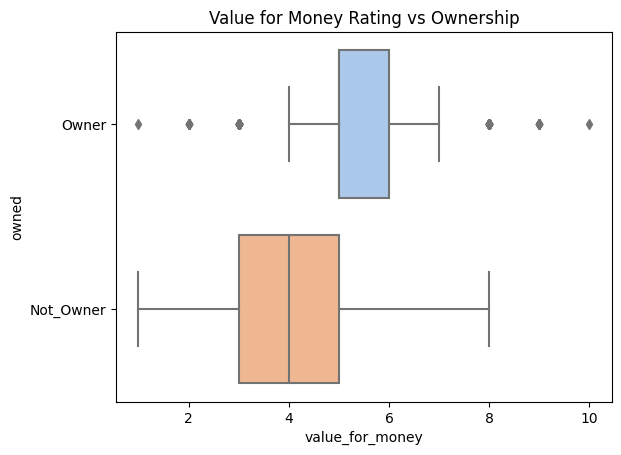

In [31]:
sns.boxplot(data=df,x='value_for_money',y='owned')
plt.title('Value for Money Rating vs Ownership')

Text(0.5, 1.0, 'Reviewer Age vs Ownership')

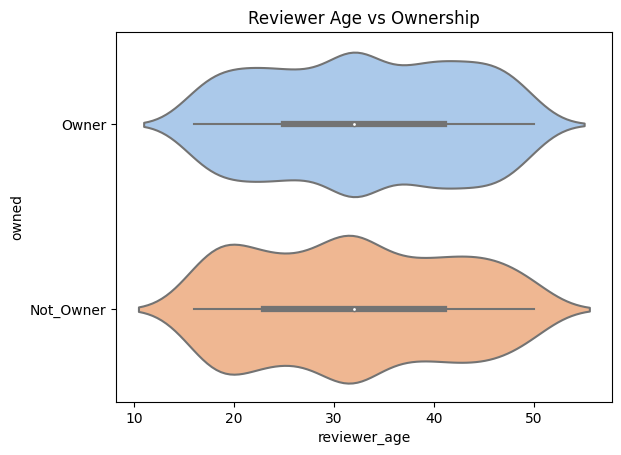

In [32]:
sns.violinplot(data=df,x='reviewer_age',y='owned')
plt.title('Reviewer Age vs Ownership')

Text(0.5, 1.0, 'Review count from different Web Browsers')

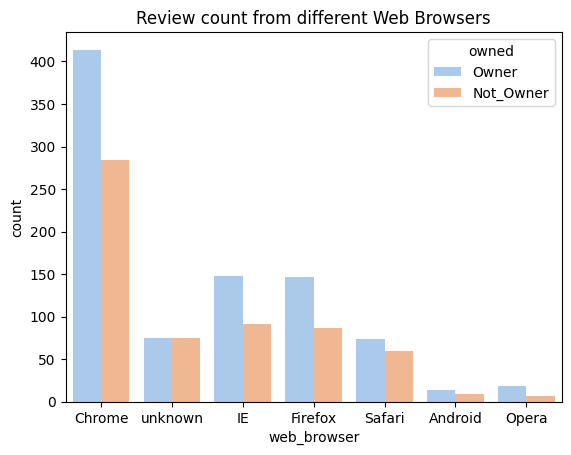

In [33]:
sns.countplot(x='web_browser',hue='owned',data=df)
plt.title('Review count from different Web Browsers')

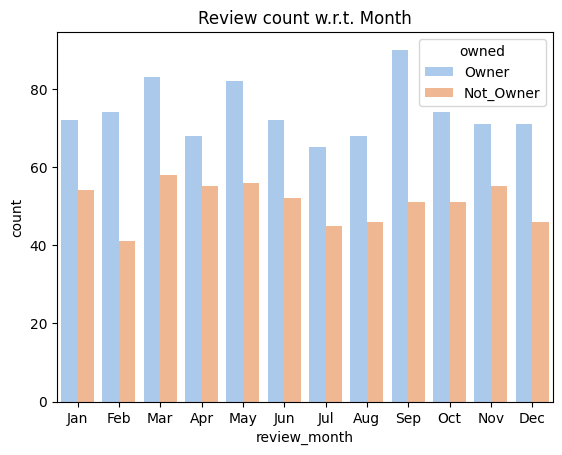

In [52]:
sns.countplot(x='review_month',data=df, order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],hue='owned',dodge=True)
plt.title('Review count w.r.t. Month')
plt.show()

Text(0.5, 1.0, 'Overall Rating vs Make Model')

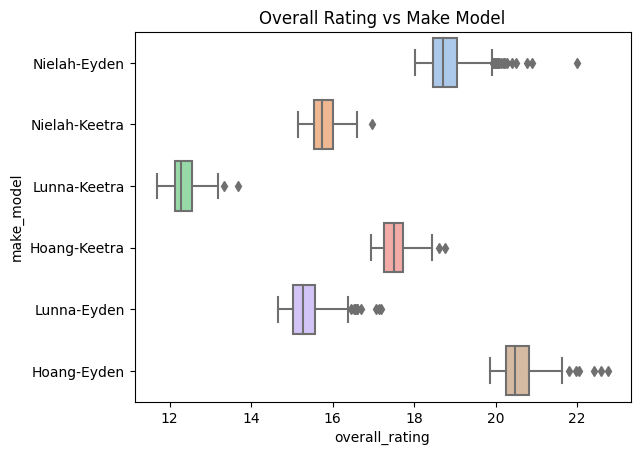

In [35]:
sns.boxplot(data=df,x='overall_rating',y='make_model')
plt.title('Overall Rating vs Make Model')

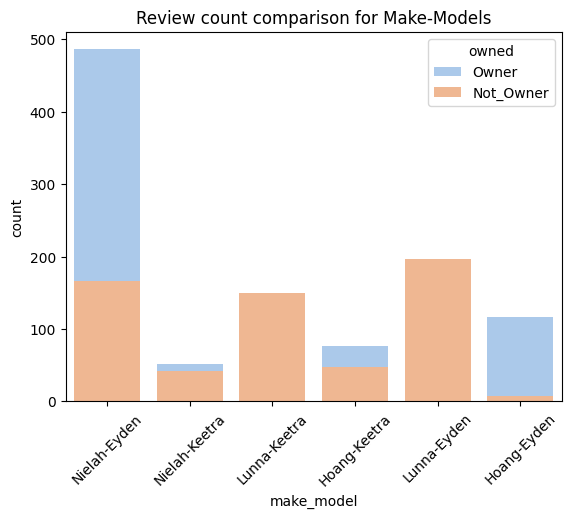

In [53]:
ax = sns.countplot(x='make_model',data=df,hue='owned',dodge=False)
plt.title('Review count comparison for Make-Models')
plt.xticks(rotation=45)
plt.show()

## Task 5

- Data has labels and 2 different labels. Therefore in this case, it is a **Binary Classification** problem.

## Task 6

- **Baseline Model**: According to sklearn machine learning classifiers sheet. The best calssifier for this type of data is SGD Classifier.

-  **Data preperation for modelling**: Features & labels needs to be label encoded, scaled and one-hot encoded according to their datatype.

Encoding Target Label

In [54]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['owned'] = le.fit_transform(df['owned'])

df.head()

,owned,make_model,review_month,web_browser,reviewer_age,primary_use,value_for_money,overall_rating
0,1,Nielah-Eyden,Oct,Chrome,23,Commuting,5,18.62
1,0,Nielah-Keetra,Jun,unknown,24,Commuting,4,15.55
2,0,Lunna-Keetra,Oct,Chrome,28,Commuting,5,12.76
3,1,Hoang-Keetra,Nov,IE,41,Leisure,5,17.07
4,1,Lunna-Keetra,Sep,Chrome,33,Leisure,5,12.29


Get dummies for all catergorical features

In [55]:
df = pd.get_dummies(df)
df.head()

,owned,reviewer_age,value_for_money,overall_rating,make_model_Hoang-Eyden,make_model_Hoang-Keetra,make_model_Lunna-Eyden,make_model_Lunna-Keetra,make_model_Nielah-Eyden,make_model_Nielah-Keetra,review_month_Apr,review_month_Aug,review_month_Dec,review_month_Feb,review_month_Jan,review_month_Jul,review_month_Jun,review_month_Mar,review_month_May,review_month_Nov,review_month_Oct,review_month_Sep,web_browser_Android,web_browser_Chrome,web_browser_Firefox,web_browser_IE,web_browser_Opera,web_browser_Safari,web_browser_unknown,primary_use_Commuting,primary_use_Leisure
0,1,23,5,18.62,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
1,0,24,4,15.55,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0
2,0,28,5,12.76,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
3,1,41,5,17.07,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
4,1,33,5,12.29,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1


## Model Fitting
- Predicting whether the review was from an owner or non-owner of the mopet bike. 
- I have chosen **SGDClassifier** as it suits with our dataframe properties as per sklearn cheat sheet.

In [78]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [79]:
X, y = df.drop('owned',axis=1), df.iloc[:,0]

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=123)

In [80]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

sgd_clf = SGDClassifier()
sgd_clf.fit(X_train,y_train)

y_pred_sgd = sgd_clf.predict(X_test)
print('Precision Score with SGD: {:.4f}'.format(precision_score(y_test,y_pred_sgd)))
print('Accuracy of SGD: {:.4f}'.format(accuracy_score(y_test,y_pred_sgd)))

Precision Score with SGD: 0.6718
Accuracy of SGD: 0.6433


- Accuracy of SGD Classifier: 61%
- Precision of 67.18%
- Let us perform hyperparameter tuning for enhanced performance.

In [81]:
params = {
    "loss":["hinge","log","squared_hinge","modified_huber","perceptron"],
    "alpha":[0.001,0.01,0.1,0.2],
    "penalty": ["l2","l1","elasticnet","none"]
}

sgd_clf = SGDClassifier(max_iter=1000)
sgd_grid = GridSearchCV(sgd_clf,param_grid=params,cv=10,scoring='precision')

sgd_grid.fit(X_train,y_train)
print(sgd_grid.best_params_)

{'alpha': 0.001, 'loss': 'log', 'penalty': 'l2'}


In [83]:
sgd_clf = SGDClassifier(alpha= 0.001, loss= 'log', penalty= 'l2')
sgd_clf.fit(X_train,y_train)

y_pred_sgd = sgd_clf.predict(X_test)
print('Precision Score with tuned SGD: {:.4f}'.format(precision_score(y_test,y_pred_sgd)))
print('Accuracy of tuned SGD: {:.4f}'.format(accuracy_score(y_test,y_pred_sgd)))

Precision Score with tuned SGD: 0.7626
Accuracy of tuned SGD: 0.7667


- Accuracy with tuned SGDClassifier: **75.67%**
- Precision with tuned SGD: **76.26%**

## Task 7
- **Comparison Model**: For comparison model, we can try different classifier and match their performace to choose the best as dataset is small and needs less computing.
- **Models**: SVC, AdaBoost, GradientBoosting, LinearDiscriminantAnalysis & XGBoost.

In [61]:
from sklearn.metrics import accuracy_score, log_loss, roc_curve, roc_auc_score, plot_roc_curve
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier
import xgboost as xgb

classifiers = [
    SVC(kernel="rbf", C=0.025, probability=True),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    LinearDiscriminantAnalysis(),
    SGDClassifier(alpha= 0.2, loss= 'modified_huber', penalty= 'l1'),
    xgb.XGBClassifier()
]

# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss","fpr","tpr","auc"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    
    train_predictions = clf.predict_proba(X_test)[::,1]
    fpr, tpr, _ = roc_curve(y_test, train_predictions)
    auc = roc_auc_score(y_test, train_predictions)
    print("ROC AUC Score: {}".format(auc))
    
    log_entry = pd.DataFrame([[name, acc*100, ll,fpr,tpr,auc]], columns=log_cols)
    log = log.append(log_entry) 
    
print("="*30)


SVC
****Results****
Accuracy: 58.0000%
Log Loss: 0.5401450559603193
ROC AUC Score: 0.7913245758073345
AdaBoostClassifier
****Results****
Accuracy: 74.6667%
Log Loss: 0.673071613142737
ROC AUC Score: 0.8415435139573071
GradientBoostingClassifier
****Results****
Accuracy: 77.0000%
Log Loss: 0.492102175201033
ROC AUC Score: 0.8284072249589491
LinearDiscriminantAnalysis
****Results****
Accuracy: 77.3333%
Log Loss: 0.4794394645749074
ROC AUC Score: 0.8379857690202518
SGDClassifier
****Results****
Accuracy: 75.6667%
Log Loss: 0.5082427124173657
ROC AUC Score: 0.8385559204524721
XGBClassifier
****Results****
Accuracy: 75.3333%
Log Loss: 0.5692160284289275
ROC AUC Score: 0.8083378945447911


- GradientBoostingClassifier, LinearDiscriminantAnalysis & XGBClassifier are top performing classifiers.
- Among all, choosing **XGBoost** as it has more parameters which gives more room for tuning. 

## XGBoost Hyperparamter Tuning using GridSearchCV

In [84]:
estimator = xgb.XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)

parameters = {
    'max_depth': range (2, 6, 2),
    'n_estimators': range(50, 200, 50),
    'learning_rate': [0.2,0.3,0.4]
}

grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'precision',
    n_jobs = 10,
    cv = 10,
    verbose=True
)

grid_search.fit(X, y)
print(grid_search.best_estimator_)

Fitting 10 folds for each of 18 candidates, totalling 180 fits
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.3, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=50, n_jobs=4,
              nthread=4, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, ...)


In [88]:
xg_cl = xgb.XGBClassifier(max_depth=2,learning_rate=0.3,n_estimators=50)
xg_cl.fit(X_train, y_train)

y_pred_xgb = xg_cl.predict(X_test)
# Compute the accuracy: accuracy
accuracy = float(np.sum(y_pred_xgb==y_test))/y_test.shape[0]
precision = (y_test,y_pred_xgb)
print("Accuracy of tuned XGB: %f" % (accuracy))

Accuracy of tuned XGB: 0.790000


- Accuracy with tuned hyperparameters of XGBClassifier: **79.00%**

## Task 8

I chose **SGDClassifier in Task 6** because of the following reasons:
- Data has >50 samples.
- Predicting a category.
- Data is labelled
- <100k samples

I chose **XGBClassifier in Task 7** because of the following reasons:
- It has high accuracy and ROC AUC score on fitting as compared to others.
- It usually enhances perfromance when hyperparameters are tuned.
- It is generally a high performance algorithm for classification.

## Task 9

- **Model Evaluation**:

	I am choosing accuracy and ROC-AUC Score for evaluation. 
	- Precision & ROC-AUC Score for SGDClassifier are 76.0% & 0.82 respectively.
	- Precision & ROC-AUC Score for XGBClassifier are 79.0% & 0.83 respectively.

- 	**Classification Report**
	- SGDClassifier

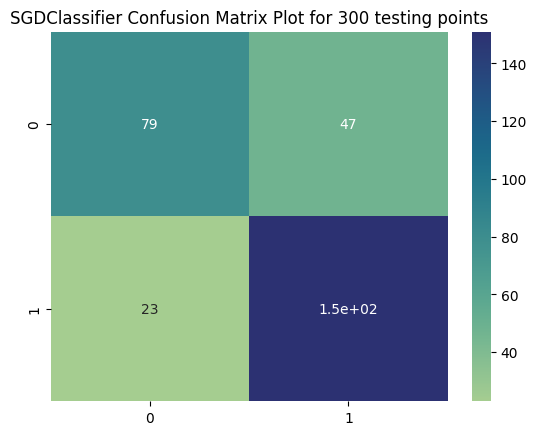

              precision    recall  f1-score   support

           0       0.77      0.63      0.69       126
           1       0.76      0.87      0.81       174

    accuracy                           0.77       300
   macro avg       0.77      0.75      0.75       300
weighted avg       0.77      0.77      0.76       300



In [99]:
from sklearn.metrics import classification_report, confusion_matrix

df_cm_s = pd.DataFrame(confusion_matrix(y_test,y_pred_sgd))
sns.heatmap(df_cm_s,annot=True, cmap='crest')
plt.title('SGDClassifier Confusion Matrix Plot for 300 testing points')
plt.show()

print(classification_report(y_test, y_pred_sgd))


- 	**Classification Report**
	- XGBClassifier

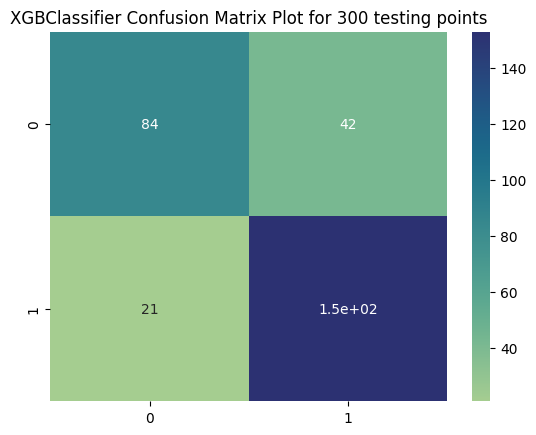

              precision    recall  f1-score   support

           0       0.80      0.67      0.73       126
           1       0.78      0.88      0.83       174

    accuracy                           0.79       300
   macro avg       0.79      0.77      0.78       300
weighted avg       0.79      0.79      0.79       300



In [100]:
df_cm_x = pd.DataFrame(confusion_matrix(y_test,y_pred_xgb))
sns.heatmap(df_cm_x,annot=True, cmap='crest')
plt.title('XGBClassifier Confusion Matrix Plot for 300 testing points')
plt.show()

print(classification_report(y_test, y_pred_xgb))

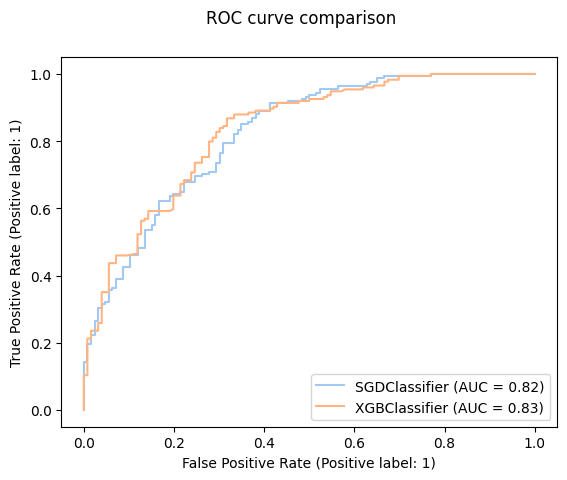

In [101]:
from sklearn.metrics import plot_roc_curve

sgd_clf = SGDClassifier(alpha=0.01, loss='log', penalty='l2')
sgd_clf.fit(X_train,y_train)

xg_cl = xgb.XGBClassifier(max_depth=2,learning_rate=0.3,n_estimators=50)
xg_cl.fit(X_train, y_train)

sgd_disp = plot_roc_curve(sgd_clf, X_test, y_test)
xgb_disp = plot_roc_curve(xg_cl, X_test, y_test, ax=sgd_disp.ax_)

xgb_disp.figure_.suptitle("ROC curve comparison")

plt.show()

## Task 10

- XGBoost performed better than SGDClassifier.
- The possible reason is that as SGDClassifier is a linear model whereas XGBoost uses decision trees to capture the 	non-linear interaction between features and target.
- Also, it has the capacity to perform parallel computing to boost weak learners along with other additional features like cross validation and regularization.

## ✅  When you have finished...
- Publish your Workspace using the option on the left
- Check the published version of your report:
	- Can you see everything you want us to grade?
    - Are all the graphics visible?
- Review the grading rubric. Have you included everything that will be graded?
- Head back to the [Certification dashboard](https://app.datacamp.com/certification) to submit your practical exam